In [102]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


# Read in the file URL.
fileURL = './NewClusterSheet.csv'
# Read the file into a DataFrame.
data = pd.read_csv(fileURL)

import re

## Used Reid's function for modifying column names
def spaces_to_snake(column_name):

    s = re.sub(r"\s+", '_', column_name)
    return s.lower()

data.columns = [spaces_to_snake(col) for col in data.columns]

data = data.drop('unnamed:_1',1)

print data

                           parsedomain    h    m    r        country  \
0                       www.reb.gov.bd    H  NaN    R  United States   
1    pbsb.ditpdpontren.kemenag.go.i...  NaN  NaN  NaN      Indonesia   
2               disnaker.bandung.go.id  NaN  NaN    R      Indonesia   
3    disparkominfo.samarindakota.go...  NaN    M  NaN      Indonesia   
4    infopublik.samarindakota.go.id...  NaN    M  NaN      Indonesia   
5                    www.coremu.uff.br  NaN    M  NaN         Brazil   
6                     www.gepec.uff.br  NaN  NaN    R         Brazil   
7                www.dongnaiimm.gov.vn  NaN    M  NaN       Viet Nam   
8                www.xncdongnai.gov.vn  NaN  NaN  NaN       Viet Nam   
9                     www.serve.gov.tl    H    M  NaN  United States   
10                   gcbev.inpa.gov.br    H    M    R         Brazil   
11                  bosque.inpa.gov.br    H    M  NaN         Brazil   
12         www.tramitesparaguay.gov.py    H    M  NaN       Para

In [103]:

lst = ['h','m','r']

for lett in lst:
    for i,val in enumerate(data[lett]):
        #print val
        if data[lett][i] == lett.upper():
            data[lett][i] = 1
        else:
            data[lett][i] = 0

print data

df2 = data.copy(deep=False)



"""
## imputation
imp = Imputer(missing_values="NaN", strategy='mean', axis=0)
numeric_cols = [data.columns[i] for i,dt in enumerate(data.dtypes) if dt != 'object']





for c in numeric_cols:
    imp_val = imp.fit_transform(data[c].reshape(-1,1))
    #print(imp_val)
    imp_col = pd.DataFrame(imp_val, columns=[c])
    data[c] = imp_col
"""

#categorical dummy labeling
cat_cols = [data.columns[i] for i,t in enumerate(data.dtypes) if t == 'object']


#d2 = pd.DataFrame(data)

for c in cat_cols:
    
    dum_col = pd.get_dummies(data[c],prefix=c)
    data = pd.concat([data, dum_col], axis=1).drop(c,axis=1)

#print data
#print d2

print df2


/Users/nicholasjones/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nicholasjones/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                           parsedomain  h  m  r        country        os  \
0                       www.reb.gov.bd  1  0  1  United States     Linux   
1    pbsb.ditpdpontren.kemenag.go.i...  0  0  0      Indonesia   Unknown   
2               disnaker.bandung.go.id  0  0  1      Indonesia   Unknown   
3    disparkominfo.samarindakota.go...  0  1  0      Indonesia     Linux   
4    infopublik.samarindakota.go.id...  0  1  0      Indonesia     Linux   
5                    www.coremu.uff.br  0  1  0         Brazil     Linux   
6                     www.gepec.uff.br  0  0  1         Brazil     Linux   
7                www.dongnaiimm.gov.vn  0  1  0       Viet Nam     Linux   
8                www.xncdongnai.gov.vn  0  0  0       Viet Nam     Linux   
9                     www.serve.gov.tl  1  1  0  United States     Linux   
10                   gcbev.inpa.gov.br  1  1  1         Brazil     Linux   
11                  bosque.inpa.gov.br  1  1  0         Brazil     Linux   
12         w

In [104]:

for i,t in enumerate(data.dtypes):
    print(data.columns[i])
    print t

archived
int64
parsedomain_actualizacion.cnh.gob.ve
float64
parsedomain_alimentacion.cnh.gob.ve
float64
parsedomain_asmenvis.nic.in
float64
parsedomain_baanbumagrood.pbn3.go.th
float64
parsedomain_bnhsenvis.nic.in
float64
parsedomain_bosque.inpa.gov.br
float64
parsedomain_bpk-manado.litbang.dephut.go.i...
float64
parsedomain_bsienvis.nic.in
float64
parsedomain_casmbenvis.nic.in
float64
parsedomain_chat.cnh.gob.ve
float64
parsedomain_chenvis.nic.in
float64
parsedomain_classifieds.aim.gov.my
float64
parsedomain_congreso.cnh.gob.ve
float64
parsedomain_controle.cmvalente.ba.gov.br
float64
parsedomain_cpreecenvis.nic.in
float64
parsedomain_disnaker.bandung.go.id
float64
parsedomain_disparkominfo.samarindakota.go...
float64
parsedomain_edu.se.df.gov.br
float64
parsedomain_emprienvis.nic.in
float64
parsedomain_enciclopedia.cnh.gob.ve
float64
parsedomain_envisecotourism.nic.in
float64
parsedomain_fcpms.nic.in
float64
parsedomain_frlhtenvis.nic.in
float64
parsedomain_gcbev.inpa.gov.br
float64
p

In [105]:
from sklearn.cluster import KMeans

km = KMeans()
z = km.fit_predict(data)
print z

[2 6 7 5 5 0 7 0 6 4 2 4 4 2 5 6 4 3 0 3 3 0 3 3 0 0 3 0 3 3 3 0 3 0 3 0 0
 0 0 0 0 0 7 6 7 7 3 6 4 4 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 4 4 4 4 4 4 3 4 4 4 4 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 3
 3 3 3 5 5 5 5 5 5 5 4 6 2 2]


In [106]:
df2['cluster'] = 0

In [108]:
for i in xrange(0,len(df2['cluster'])):
    df2['cluster'][i] = z[i]
print df2['cluster']

/Users/nicholasjones/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0      2
1      6
2      7
3      5
4      5
5      0
6      7
7      0
8      6
9      4
10     2
11     4
12     4
13     2
14     5
15     6
16     4
17     3
18     0
19     3
20     3
21     0
22     3
23     3
24     0
25     0
26     3
27     0
28     3
29     3
      ..
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    6
107    1
108    1
109    1
110    3
111    3
112    3
113    3
114    5
115    5
116    5
117    5
118    5
119    5
120    5
121    4
122    6
123    2
124    2
Name: cluster, dtype: int64


In [109]:
print df2

                           parsedomain  h  m  r        country        os  \
0                       www.reb.gov.bd  1  0  1  United States     Linux   
1    pbsb.ditpdpontren.kemenag.go.i...  0  0  0      Indonesia   Unknown   
2               disnaker.bandung.go.id  0  0  1      Indonesia   Unknown   
3    disparkominfo.samarindakota.go...  0  1  0      Indonesia     Linux   
4    infopublik.samarindakota.go.id...  0  1  0      Indonesia     Linux   
5                    www.coremu.uff.br  0  1  0         Brazil     Linux   
6                     www.gepec.uff.br  0  0  1         Brazil     Linux   
7                www.dongnaiimm.gov.vn  0  1  0       Viet Nam     Linux   
8                www.xncdongnai.gov.vn  0  0  0       Viet Nam     Linux   
9                     www.serve.gov.tl  1  1  0  United States     Linux   
10                   gcbev.inpa.gov.br  1  1  1         Brazil     Linux   
11                  bosque.inpa.gov.br  1  1  0         Brazil     Linux   
12         w

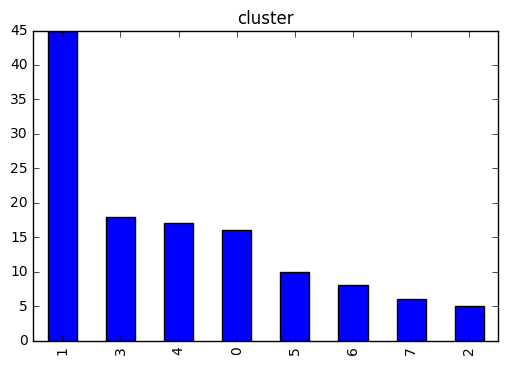

In [111]:
plt.figure()
pd.value_counts(df2['cluster']).plot(kind='bar',title='cluster')

In [116]:
print df2[df2.cluster==4]

                     parsedomain  h  m  r        country       os  archived  \
9               www.serve.gov.tl  1  1  0  United States    Linux         1   
11            bosque.inpa.gov.br  1  1  0         Brazil    Linux         1   
12   www.tramitesparaguay.gov.py  1  1  0       Paraguay  Unknown         1   
16         www.ipssalocri.gov.it  1  0  0          Italy    Linux         1   
48                jsm.aim.gov.my  1  1  0       Malaysia    Linux         1   
49        classifieds.aim.gov.my  1  1  0       Malaysia    Linux         0   
76            mujeres.agn.gob.ve  1  1  0      Venezuela    Linux         1   
77        tierrafirme.cnh.gob.ve  1  1  0      Venezuela    Linux         0   
78            soporte.cnh.gob.ve  1  1  0      Venezuela    Linux         0   
79            rsocial.cnh.gob.ve  1  1  0      Venezuela    Linux         0   
80         nuestrosur.cnh.gob.ve  1  1  0      Venezuela    Linux         0   
81       enciclopedia.cnh.gob.ve  1  1  0      Venez

In [117]:
print df2

                           parsedomain  h  m  r        country        os  \
0                       www.reb.gov.bd  1  0  1  United States     Linux   
1    pbsb.ditpdpontren.kemenag.go.i...  0  0  0      Indonesia   Unknown   
2               disnaker.bandung.go.id  0  0  1      Indonesia   Unknown   
3    disparkominfo.samarindakota.go...  0  1  0      Indonesia     Linux   
4    infopublik.samarindakota.go.id...  0  1  0      Indonesia     Linux   
5                    www.coremu.uff.br  0  1  0         Brazil     Linux   
6                     www.gepec.uff.br  0  0  1         Brazil     Linux   
7                www.dongnaiimm.gov.vn  0  1  0       Viet Nam     Linux   
8                www.xncdongnai.gov.vn  0  0  0       Viet Nam     Linux   
9                     www.serve.gov.tl  1  1  0  United States     Linux   
10                   gcbev.inpa.gov.br  1  1  1         Brazil     Linux   
11                  bosque.inpa.gov.br  1  1  0         Brazil     Linux   
12         w